In [306]:
import gdown

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # Кодирование категориальных данных

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler # Масштабирование данных

from sklearn.feature_selection import SelectKBest # Выбор признаков с наивысшими оценками
from sklearn.feature_selection import chi2 # Выбор признаков по Хи квадрат

from sklearn.model_selection import train_test_split # Деление выборки на тестовые и тренировочные данные
from sklearn.model_selection import cross_val_score # Оценка качества работы модели

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Критерий качества, точности

from sklearn.neighbors import KNeighborsClassifier # Обучение модели K-ближайших соседей
from sklearn.linear_model import LinearRegression # Линейная регрессия (метод наименьших квадратов)

from sklearn.tree import DecisionTreeClassifier # Деревья решений
from sklearn.ensemble import RandomForestClassifier # Ансамбли деревьев решений
from sklearn.ensemble import GradientBoostingClassifier # Ансамбли градиентного спуска

from sklearn.ensemble import RandomForestRegressor # случайный лес
from sklearn.neighbors import KNeighborsRegressor # метод ближайших соседей
from sklearn.svm import SVR # метод опорных векторов с линейным ядром
from sklearn.linear_model import LogisticRegression # логистическая регрессия

from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif # Статистический метод
from sklearn.metrics import r2_score

In [307]:
# Скачивание данных из Google Disk
# gdown.download(id='1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec')

# Загрузка файла из Git репозитория в Pandas
# dataset = pd.read_csv('https://raw.githubusercontent.com/SotGE/innopolis2023/main/lesson12/diabetes.csv', sep=',')

# Загрузка данных из локального хранилища
dataset = pd.read_csv(r"diabetes.csv", sep=',')

# Первые ячейки
dataset.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [308]:
# Размер данных (количество строк, колонок)
dataset.shape

(768, 9)

In [309]:
# Заголовки столбцов в нижнем регистре
dataset.columns = [col.lower() for col in dataset.columns]
dataset.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [310]:
# Проверка пропущенных значений
dataset.isnull().mean()

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

In [311]:
# Количество неопределенные значений (неправильно считанные)
dataset.isna().mean()

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

In [312]:
# Проверка значений на 0
(dataset == 0).sum()

pregnancies                 111
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                     500
dtype: int64

In [313]:
# Заполнение нулевых значений - медианой
dataset = dataset.replace(0, dataset.median())
dataset

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              3      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     diabetespedigreefunction  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [314]:
# Проверка значений на 0
(dataset == 0).sum()

pregnancies                   0
glucose                       0
bloodpressure                 0
skinthickness                 0
insulin                       0
bmi                           0
diabetespedigreefunction      0
age                           0
outcome                     500
dtype: int64

In [315]:
# Описательная статистика
dataset.describe(include='all', percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

count        mean         std     min     10%  \
pregnancies               768.0    4.278646    3.021516   1.000   1.000   
glucose                   768.0  121.656250   30.438286  44.000  86.700   
bloodpressure             768.0   72.386719   12.096642  24.000  58.000   
skinthickness             768.0   27.334635    9.229014   7.000  18.000   
insulin                   768.0   94.652344  105.547598  14.000  30.500   
bmi                       768.0   32.450911    6.875366  18.200  24.000   
diabetespedigreefunction  768.0    0.471876    0.331329   0.078   0.165   
age                       768.0   33.240885   11.760232  21.000  22.000   
outcome                   768.0    0.348958    0.476951   0.000   0.000   

                               25%       50%        75%       90%     max  
pregnancies                2.00000    3.0000    6.00000    9.0000   17.00  
glucose                   99.75000  117.0000  140.25000  167.0000  199.00  
bloodpressure             64.00000   72.0000   80.00000   88.0000  122.00  
skinthickness             23.00000   23.0000   32.00000   40.0000   99.00  
insulin                   30.50000   31.2500  127.25000  210.0000  846.00  
bmi                       27.50000   32.0000   36.60000   41.5000   67.10  
diabetespedigreefunction   0.24375    0.3725    0.62625    0.8786    2.42  
age                       24.00000   29.0000   41.00000   51.0000   81.00  
outcome                    0.00000    0.0000    1.00000    1.0000    1.00

In [316]:
# Просмотр типов данных в датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    float64
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [317]:
# Разделение для задачи классификации на X (data features) и y (outcome)
X = dataset.drop(columns=['outcome'])
y = dataset['outcome']

In [318]:
# Построить распределение для всех числовых переменных
figure = px.box(X)
figure.show()

In [319]:
# Подготовка данных
# Нормализация (StandardScaler)
scalar = StandardScaler()
features = scalar.fit_transform(X, y)
features

array([[ 0.57007018,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-1.08580689, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23242101,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.23889477, -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-1.08580689,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-1.08580689, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [320]:
# Массив в Pandas
X_normalised = pd.DataFrame(features, columns=X.columns)
X_normalised

pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.570070  0.866045      -0.031990       0.831114 -0.608201  0.167240   
1      -1.085807 -1.205066      -0.528319       0.180566 -0.608201 -0.851551   
2       1.232421  2.016662      -0.693761      -0.469981 -0.608201 -1.331838   
3      -1.085807 -1.073567      -0.528319      -0.469981 -0.006185 -0.633239   
4      -0.423456  0.504422      -2.679076       0.831114  0.695378  1.549885   
..           ...       ...            ...            ...       ...       ...   
763     1.894772 -0.679069       0.298896       2.240633  0.809145  0.065361   
764    -0.754631  0.011301      -0.197433      -0.036283 -0.608201  0.632973   
765     0.238895 -0.021574      -0.031990      -0.469981  0.164466 -0.909768   
766    -1.085807  0.142800      -1.024647      -0.469981 -0.608201 -0.342155   
767    -1.085807 -0.942068      -0.197433       0.397415 -0.608201 -0.298493   

     diabetespedigreefunction       age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 8 columns]

In [321]:
# Построить распределение для всех числовых нормализированных переменных
figure = px.box(X_normalised)
figure.show()

In [322]:
# Разделение на тренировочную и тестовую (25%) для классификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=512, shuffle=True)

In [323]:
# Укажите score модели (метрики) и постройте визуализацию обученной классификации для указанных k

def model_report(model, X_test, y_test, average='weighted'):
  # Проведите тестирование модели
  # Делаем предсказания на тестовом наборе
  y_pred = model.predict(X_test)

  # Оцениваем точность модели
  accuracy_eff = accuracy_score(y_test, y_pred)
  print(f"Правильность (accuracy) модели: {accuracy_eff}")

  precision_eff = precision_score(y_test, y_pred, average=average)
  print(f"Точность (precision) модели: {precision_eff}")

  recall_eff = recall_score(y_test, y_pred, average=average)
  print(f"Полнота (recall) модели: {recall_eff}")

  f1_eff = f1_score(y_test, y_pred, average=average)
  print(f"F1 мера модели: {f1_eff}")
  
  # # Построение графика решающих областей 2D для бинарной классификации
  # x_min, x_max = X_test.to_numpy()[:, 0].min() - 1, X_test.to_numpy()[:, 0].max() + 1
  # y_min, y_max = X_test.to_numpy()[:, 1].min() - 1, X_test.to_numpy()[:, 1].max() + 1
  # xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

  # # Предсказание значений на сетке
  # Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  # Z = Z.reshape(xx.shape)

  # # Построение контуров
  # plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
  
  # Разметка классов
  for i, c in zip(range(2), 's^o'):
      plt.scatter(X_test.to_numpy()[y_test.to_numpy() == i][:, 0], X_test.to_numpy()[y_test.to_numpy() == i][:, 1], marker=c, label=f"Class {i}")

  plt.xlabel('Признак 1')
  plt.ylabel('Признак 2')
  plt.title(f'Результат классификации ({type(model).__name__})')
  plt.legend()
  plt.show()

In [324]:
# Загрузить классификатор модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn = KNeighborsClassifier()

Правильность на обучающем наборе: 0.762
Правильность на тестовом наборе: 0.760
Правильность (accuracy) модели: 0.7621527777777778
Точность (precision) модели: 0.7580218799294434
Полнота (recall) модели: 0.7621527777777778
F1 мера модели: 0.7574016400143433


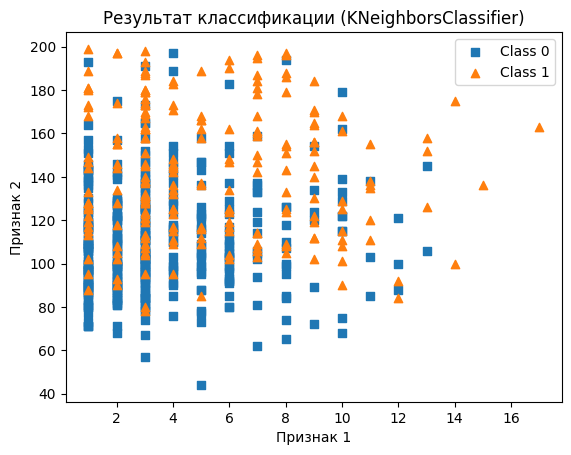

In [325]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn.set_params(n_neighbors=25)
model_knn.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn.score(X_test, y_test)))
model_report(model_knn, X_train, y_train)

In [326]:
# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25
score_best = 0
best_n_neighbors = 0

for k in np.arange(5, 26, 5):
  model_knn.set_params(n_neighbors=k)
  scores = cross_val_score(model_knn, X_train, y_train)
  print(f"k: {k}, по scores - {scores}")
  score_avg = np.mean(scores)
  if score_avg > score_best:
    score_best = score_avg
    best_n_neighbors = k

print(f"Лучший k по scores - {best_n_neighbors}")

k: 5, по scores - [0.71551724 0.73043478 0.73043478 0.73913043 0.73043478]
k: 10, по scores - [0.69827586 0.75652174 0.76521739 0.73043478 0.67826087]
k: 15, по scores - [0.6637931  0.74782609 0.74782609 0.69565217 0.65217391]
k: 20, по scores - [0.63793103 0.70434783 0.72173913 0.73913043 0.67826087]
k: 25, по scores - [0.65517241 0.73913043 0.72173913 0.69565217 0.63478261]
Лучший k по scores - 5


Правильность на обучающем наборе: 0.800
Правильность на тестовом наборе: 0.688
Правильность (accuracy) модели: 0.8003472222222222
Точность (precision) модели: 0.798472498618021
Полнота (recall) модели: 0.8003472222222222
F1 мера модели: 0.7989809759163293


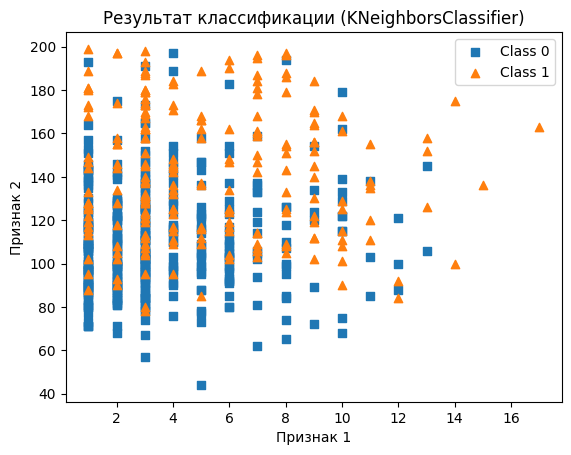

In [327]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn_best = KNeighborsClassifier(n_neighbors=5)
model_knn_best.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn_best.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn_best.score(X_test, y_test)))
model_report(model_knn_best, X_train, y_train)

In [328]:
# Выбор 2 лучших признаков по Хи квадрат
selector = SelectKBest(chi2, k=2)

X_train_best = selector.fit_transform(X_train, y_train)
X_train_best_df = pd.DataFrame(X_train_best)
X_train_best_df

X_test_best = selector.fit_transform(X_test, y_test)
X_test_best_df = pd.DataFrame(X_test_best)
X_test_best_df

0      1
0     87.0   30.5
1     89.0   85.0
2    158.0   30.5
3    173.0  185.0
4    111.0   30.5
..     ...    ...
187  179.0   30.5
188  171.0  135.0
189  148.0   30.5
190   84.0  115.0
191   61.0   30.5

[192 rows x 2 columns]

In [329]:
# Загрузить классификатор модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn_chi2 = KNeighborsClassifier()

Правильность на обучающем наборе: 0.733
Правильность на тестовом наборе: 0.734
Правильность (accuracy) модели: 0.7326388888888888
Точность (precision) модели: 0.727259690677937
Полнота (recall) модели: 0.7326388888888888
F1 мера модели: 0.7210738008971705


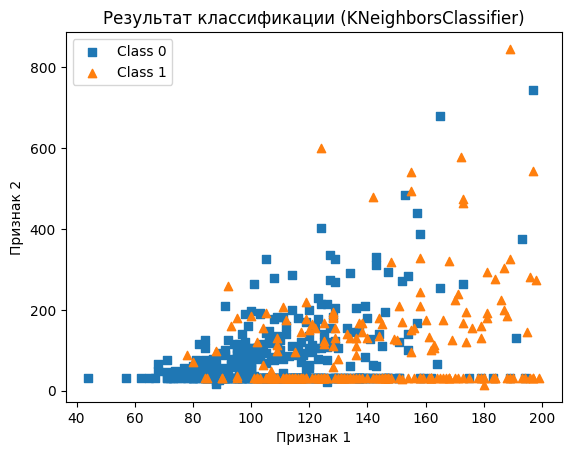

In [330]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn_chi2.set_params(n_neighbors=25)
model_knn_chi2.fit(X_train_best_df, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn_chi2.score(X_train_best_df, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn_chi2.score(X_test_best_df, y_test)))
model_report(model_knn_chi2, X_train_best_df, y_train)

In [331]:
# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25
score_best = 0
best_n_neighbors = 0

for k in np.arange(5, 26, 5):
  model_knn_chi2.set_params(n_neighbors=k)
  scores = cross_val_score(model_knn_chi2, X_train_best_df, y_train)
  print(f"k: {k}, по scores - {scores}")
  score_avg = np.mean(scores)
  if score_avg > score_best:
    score_best = score_avg
    best_n_neighbors = k

print(f"Лучший k по scores - {best_n_neighbors}")

k: 5, по scores - [0.65517241 0.7826087  0.7826087  0.70434783 0.68695652]
k: 10, по scores - [0.67241379 0.75652174 0.79130435 0.73913043 0.66086957]
k: 15, по scores - [0.64655172 0.74782609 0.7826087  0.73043478 0.63478261]
k: 20, по scores - [0.64655172 0.74782609 0.71304348 0.71304348 0.66086957]
k: 25, по scores - [0.65517241 0.73043478 0.73043478 0.70434783 0.62608696]
Лучший k по scores - 10


Правильность на обучающем наборе: 0.767
Правильность на тестовом наборе: 0.755
Правильность (accuracy) модели: 0.7673611111111112
Точность (precision) модели: 0.7645141848869944
Полнота (recall) модели: 0.7673611111111112
F1 мера модели: 0.7594891172087554


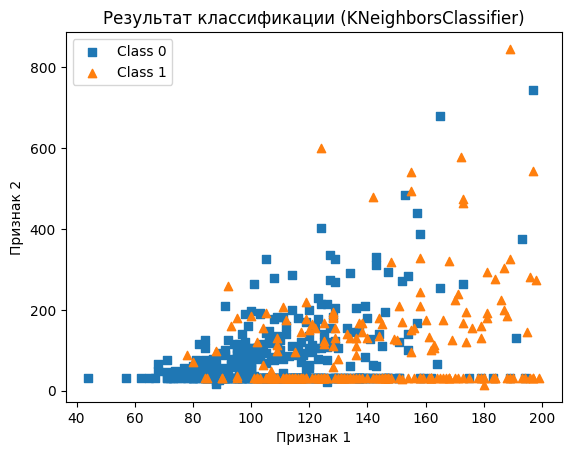

In [332]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn_chi2_best = KNeighborsClassifier(n_neighbors=10)
model_knn_chi2_best.fit(X_train_best_df, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn_chi2_best.score(X_train_best_df, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn_chi2_best.score(X_test_best_df, y_test)))
model_report(model_knn_chi2_best, X_train_best_df, y_train)

In [333]:
# Работа с множественной линейной регрессией
# {SkinThickness, BMI} и Y = {Insulin} из датасета

X_regr = dataset[['skinthickness', 'bmi']]
y_regr = dataset['insulin']

<Axes: xlabel='skinthickness', ylabel='insulin'>

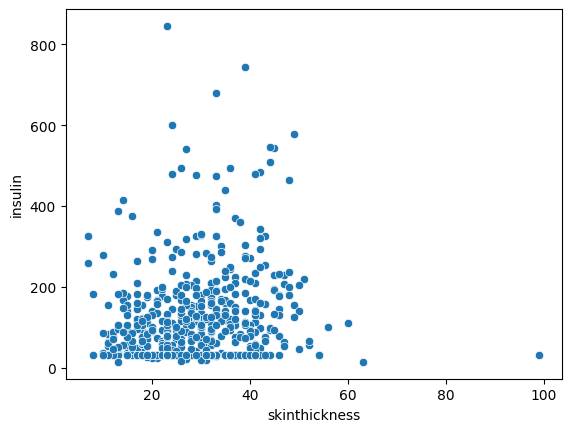

In [334]:
# График зависимости skinthickness и insulin
sns.scatterplot(x=dataset['skinthickness'], y=dataset['insulin'])

<Axes: xlabel='bmi', ylabel='insulin'>

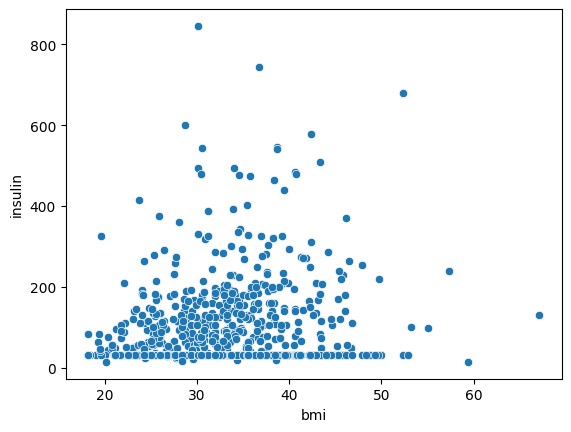

In [335]:
# График зависимости bmi и insulin
sns.scatterplot(x=dataset['bmi'], y=dataset['insulin'])

<Axes: xlabel='mean', ylabel='insulin'>

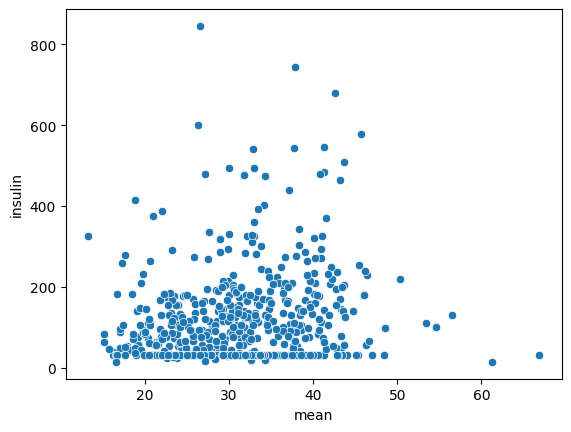

In [336]:
# График коррелиции зависимости bmi и insulin
dataset['mean'] = (dataset['bmi'] + dataset['skinthickness']) / 2
sns.scatterplot(x=dataset['mean'], y=dataset['insulin'])

In [337]:
# Разделение на тренировочную и тестовую (25%) для классификации
X_regr = dataset[['mean']]
X_train, X_test, y_train, y_test = train_test_split(X_regr, y_regr, test_size=0.25, random_state=512, shuffle=True)

In [338]:
# Тренируем модель линейной регрессией
model_regr = LinearRegression()
model_regr.fit(X_train, y_train)

LinearRegression()

In [339]:
# Метрика качества линейной регрессией на тестовой выборке
model_regr.score(X_test, y_test)

0.11724117651774324

In [340]:
# Прогноз значения целевой функции y от x
y_pred = model_regr.predict(X_test)

In [341]:
# Вывод предсказание, реальное значение в тестовой выборке и разница между ними
d = {
  'y_pred': y_pred,
  'y_test': y_test,
  'diff': np.abs(y_test - y_pred)
}
pd.DataFrame(d)
# Линейная регрессия не подходит под текущие данные

y_pred  y_test       diff
180   74.537723    30.5  44.037723
431   74.812703    85.0  10.187297
394   87.874261    30.5  57.374261
716  111.110086   185.0  73.889914
249   78.524935    30.5  48.024935
..          ...     ...        ...
212  100.660840    30.5  70.160840
110  102.173231   135.0  32.826769
166   90.074103    30.5  59.574103
554   93.373865   115.0  21.626135
352   96.811117    30.5  66.311117

[192 rows x 3 columns]

In [342]:
# Работа с алгоритмом DecisionTreeClassifier (используем ансамбли деревьев решений)
tree = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=512, shuffle=True)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))
# Мы не указывали никаких параметров у этой модели. По умолчанию, дерево растет до тех пор, пока все листья не станут "чистыми"
# и дает 100% правильность на обучающем наборе. На тестовом, как мы видим, есть ошибки. Найдем глубину дерева.

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.776


In [343]:
tree.get_depth()

16

In [344]:
# Ограничим дерево по глубине. Это может улучшить точность на тестовых данных. Точность на тренировочном наборе при этом падает.
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.795
Правильность на тестовом наборе: 0.781


In [345]:
# Похожие результаты дают ансамбли деревьев решений, хотя, учитывая множество параметров у этих методов,
# их можно постараться настроить и получше.
rf = RandomForestClassifier(min_samples_split=5, n_estimators=1000)
rf.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(rf.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(rf.score(X_test, y_test)))

Правильность на обучающем наборе: 0.995
Правильность на тестовом наборе: 0.812


In [346]:
gb = GradientBoostingClassifier(max_depth=1, n_estimators=1000)
gb.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gb.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gb.score(X_test, y_test)))

Правильность на обучающем наборе: 0.866
Правильность на тестовом наборе: 0.776


In [347]:
# Рассмотрим метрики разных алгоритмов
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          LogisticRegression() # логистическая регрессия
          ]

# Для каждой модели из списка
for model in models:
  # Обучаем модель
  model.fit(X_train, y_train)
  print(f"\nМодель {type(model).__name__}:")
  print("Правильность на обучающем наборе: {:.3f}".format(model.score(X_train, y_train)))
  print("Правильность на тестовом наборе: {:.3f}".format(model.score(X_test, y_test)))


Модель LinearRegression:
Правильность на обучающем наборе: 0.315
Правильность на тестовом наборе: 0.320

Модель RandomForestRegressor:
Правильность на обучающем наборе: 0.900
Правильность на тестовом наборе: 0.320

Модель KNeighborsRegressor:
Правильность на обучающем наборе: 0.433
Правильность на тестовом наборе: -0.018

Модель SVR:
Правильность на обучающем наборе: 0.292
Правильность на тестовом наборе: 0.320

Модель LogisticRegression:
Правильность на обучающем наборе: 0.771
Правильность на тестовом наборе: 0.807


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [348]:
# Деревья решений также дают возможность оценить важность признаков в рассматриваемой задаче.
# Это число варьирует в диапазоне от 0 до 1 для каждого признака, где 0 означает «не используется вообще»,
# а 1 означает, что «отлично предсказывает целевую переменную».
# Для задач, подобно нашей, с малым числом признаков это не очень интересно,
# тем не менее давайте посмотрим и сравним с тем результатом, который выдает статистический метод GenericUnivariateSelect.
print("\nВажности признаков (деревьев решений):\n{}".format(tree.feature_importances_))
print("\nВажности признаков (ансамбли деревьев решений):\n{}".format(rf.feature_importances_))


Важности признаков (деревьев решений):
[0.         0.59621588 0.         0.         0.03925057 0.17294055
 0.05794342 0.13364959]

Важности признаков (ансамбли деревьев решений):
[0.07596598 0.26840069 0.08291953 0.07375102 0.07255467 0.16804612
 0.11987333 0.13848865]


<Axes: >

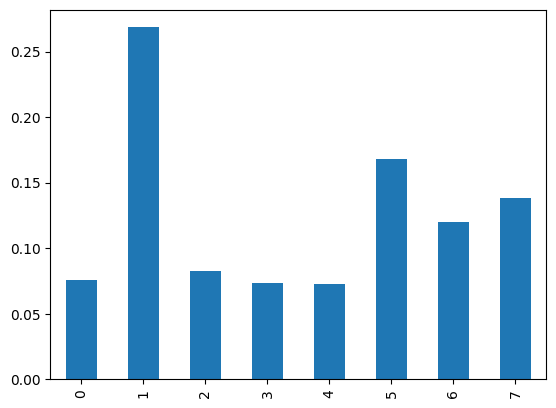

In [349]:
importances = pd.Series(rf.feature_importances_)
importances.plot.bar()

In [350]:
selector=GenericUnivariateSelect(score_func=mutual_info_classif, mode='k_best', param=3)
selector.fit(X_train, y_train)
pd.DataFrame(data={'score':selector.scores_,
                   'support':selector.get_support()}).sort_values(by='score', ascending=False)

score  support
1  0.113626     True
5  0.075996     True
7  0.051187     True
4  0.041451    False
0  0.038686    False
2  0.025510    False
6  0.020776    False
3  0.006516    False